# Basic Plotting with matplotlib

You can show matplotlib figures directly in the notebook by using the %matplotlib notebook and %matplotlib inline magic commands.

%matplotlib notebook provides an interactive environment.

So what actually has happened when you run the magic function matplotlib with the inline parameter, is that matplotlib is configured to render into the browser. This configuration is called a backend, and matplotlib has a number of different backends available. A backend is an abstraction layer which knows how to interact with the operating environment, whether it's an operating system, or an environment like the browser, and knows how to render matplotlib commands. In fact, there's a number of different interactive backends, but there are also backends called hard copy backends, which support rendering to graphics formats, like scalable vector graphics, SVGs, or PNGs.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

The next layer is where we'll spend most of our time though, and that's called the artist layer. The artist layer is an abstraction around drawing and layout primitives. The root of visuals is a set of containers which includes a figure object with one or more subplots, each with a series of one or more axes.
It also contains primitives such as Line2D, recatangle and collections such as PathCollection

 there's one more layer which is extremely important for us as data scientists in particular, and this is called the scripting layer.
 if we were writing an application to use matplotlib, we might never care about the scripting layer. But this layer helps simplify and speed up our interaction with the environment in order to build plots quickly. It does this, frankly, by doing a bunch of magic for us. And the difference between someone who is effective with matplotlib and someone who isn't, is usually based on their understanding of this magic of the scripting layer.
The scripting layer we use in this course is called pyplot.

The pyplot scripting layer is a procedural method for building a visualization, in that we tell the underlying software which drawing actions we want it to take in order to render our data. There are also declarative methods for visualizing data. HTML is a great example of this. Instead of issuing command after command to the backend rendering agent, which is the browser with HTML, HTML documents are formatted as models of relationships in a document, often called the DOM, or Document Object Model. These are two fundamentally different ways of creating and representing graphical interfaces.

The popular JavaScript library, for instance, D3.JS is an example of a declarative information visualization method. While matplotlib's pyplot is an example of a procedural information visualization method.

# MAKING GRAPHS USING PLOT FUNCTION

A plot has two axes, an x-axis along the horizon, and a y-axis which runs vertically.

In [3]:
import matplotlib.pyplot as plt

supports any number of named and unnamed arguments
the arguments will be interpreted as x, y pairs

In [4]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3,2)

<IPython.core.display.Javascript object>

In [8]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'
plt.plot(3,2,'.')

Comparable Approach

In [9]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
canvas.print_png('test.png')

In [10]:
# we can use html cell magic to display the image
%%html
<img src='test.png' />

SyntaxError: invalid syntax (<ipython-input-10-9ae0b3b37bc1>, line 3)

<IPython.core.display.Javascript object>


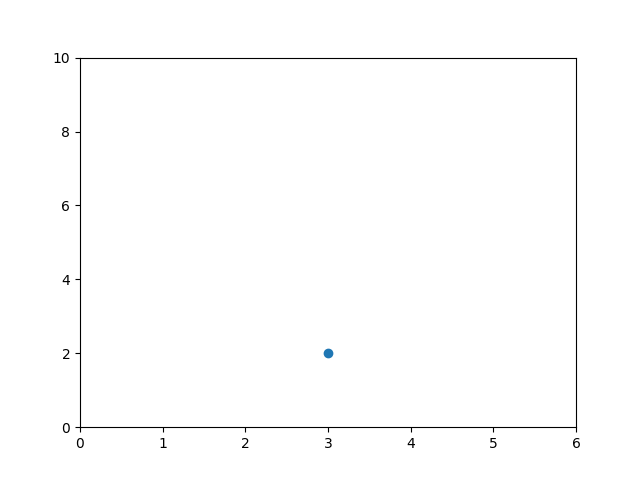

(0.0, 6.0, 0.0, 10.0)

In [11]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>


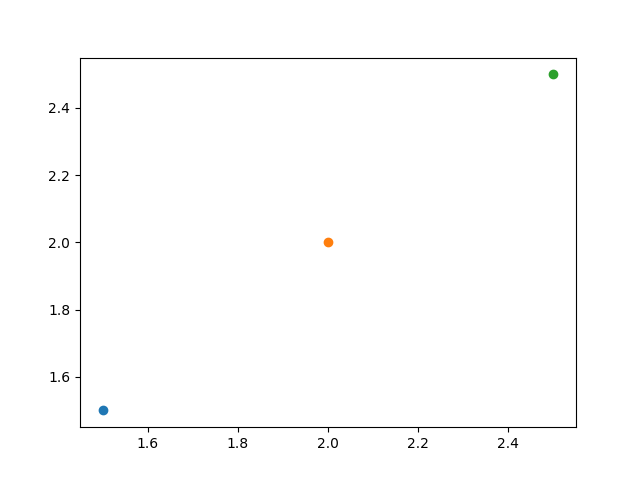

In [12]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

 we can go further with the axes object to the point where we can actually get all of the child objects that that axes contains. We do this with the axes get_children function. 

In [13]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

Here, we can see that there's actually three line to the objects contained in this axes, these are our data points. A number of spines which are actual renderings of the borders of the frame including tic markers, two axis objects, and a bunch of text which are the labels for the chart. There's even a rectangle which is the background for the axes.

# Scatterplots

A scatterplot is a two dimensional plot similar to the line plots I've shown. The scatter function takes an x-axis value as a first argument and y-axis value as the second. If the two arguments are the same, we get a nice diagonal alignment of points.

<IPython.core.display.Javascript object>


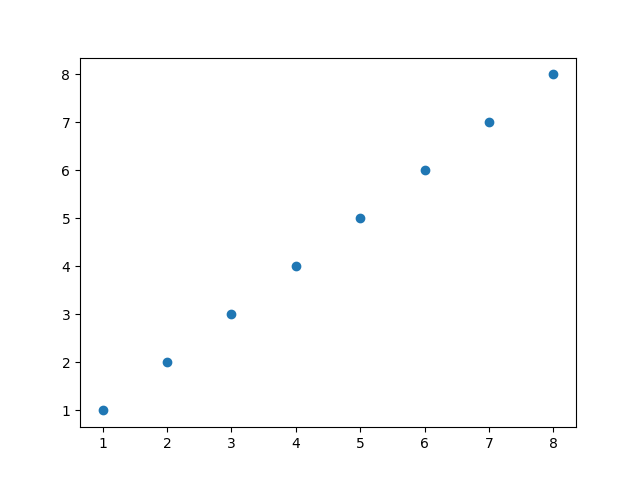

In [14]:
import numpy as np
x=np.array([1,2,3,4,5,6,7,8])
y=x
plt.figure()
plt.scatter(x,y)
# similar to  plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

<IPython.core.display.Javascript object>


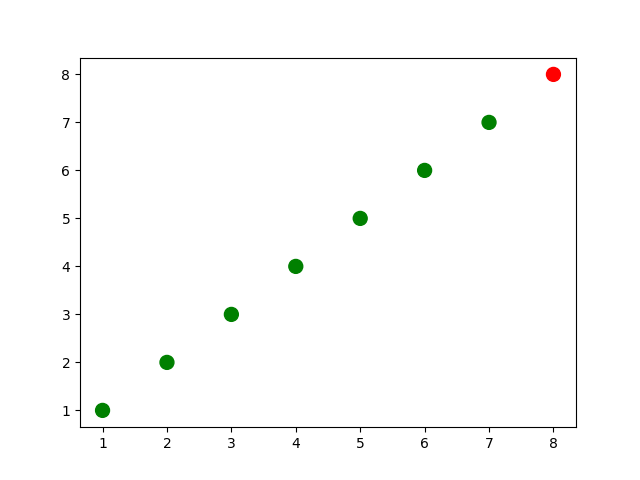

In [15]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

In [16]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [17]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


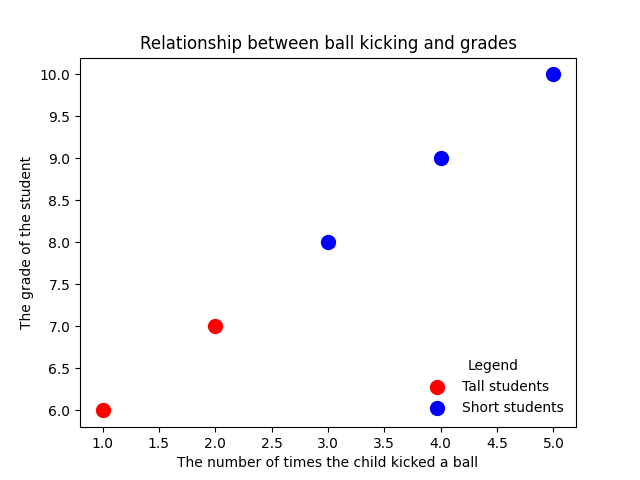

In [18]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [19]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

Text(0.5, 1.0, 'Relationship between ball kicking and grades')

In [20]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [21]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

# Line Plots

<IPython.core.display.Javascript object>


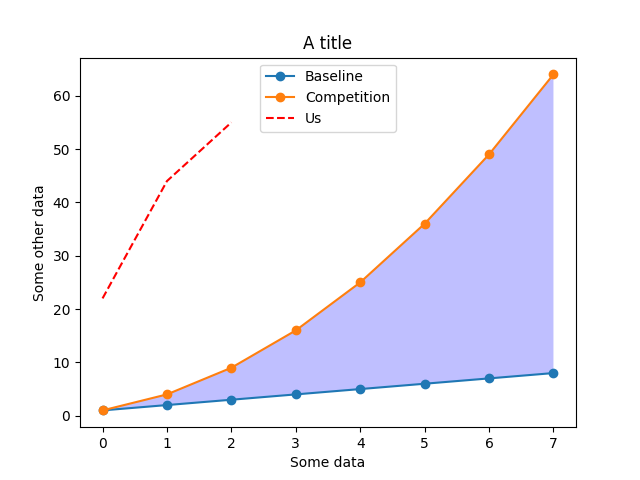

In [22]:
import numpy as np

linear_data=np.array([1,2,3,4,5,6,7,8])
exponential_data=linear_data**2

plt.figure()
plt.plot(linear_data,'-o',exponential_data,'-o')

So there are a couple of things which are new about this versus the scatter plots. First, we only gave y-axes values to our plot call, no x axes values. Instead, the plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value. Which is pretty handy when you want to make quick plots.

Second we see that the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly.

In [23]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [24]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

In [25]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data))# length
                       ,linear_data # lower bound
                       , exponential_data # upper bound
                       ,facecolor='blue' # color to fill with 
                       ,alpha=0.25 # transparency
                      )

working with dates

<IPython.core.display.Javascript object>


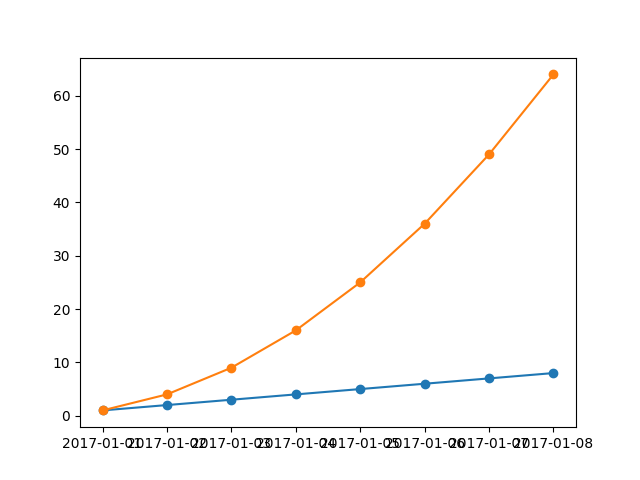

In [26]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [27]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>

RuntimeError: matplotlib does not support generators as input

In [ ]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [28]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [29]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [30]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

Text(0.5, 1.0, 'Exponential vs. Linear performance')

In [31]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

Text(0.5, 1.0, 'Exponential ($x^2$) vs. Linear ($x$) performance')

# Bar Charts

Matplotlib has support for several kinds of bar charts. The most general case, we plot a bar chart by sending in a parameter of the x components, and a parameter of the height of the bar. 

<IPython.core.display.Javascript object>


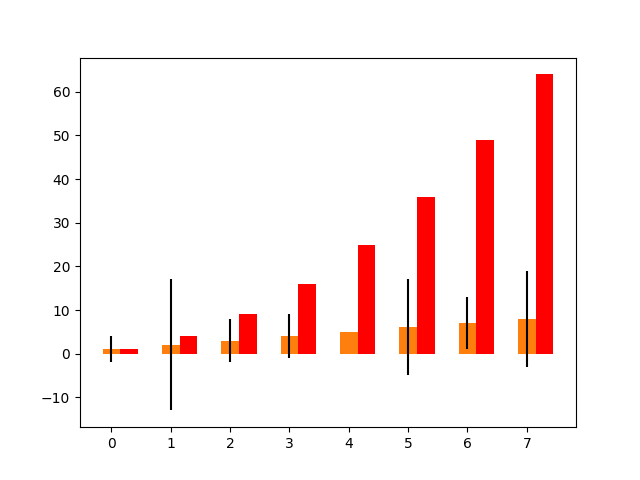

<BarContainer object of 8 artists>

In [32]:
plt.figure()
xvals=range(len(linear_data))
plt.bar(xvals,linear_data,width=0.3)

In [33]:
new_xvals=[]

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)
plt.bar(new_xvals,exponential_data,width=0.3,color='red')

<BarContainer object of 8 artists>

 you can add error bars to each bar as well, using the y-error parameter.

For example, each of our pieces of data in the linear data might actually be a mean value, computed from many different observations. 

In [34]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<BarContainer object of 8 artists>

We can also do stacked bar charts as well. For instance, if we wanted to show cumulative values while also keeping the series independent, we could do this by setting the bottom parameter and our second plot to be equal to first set of data to plot.

<IPython.core.display.Javascript object>


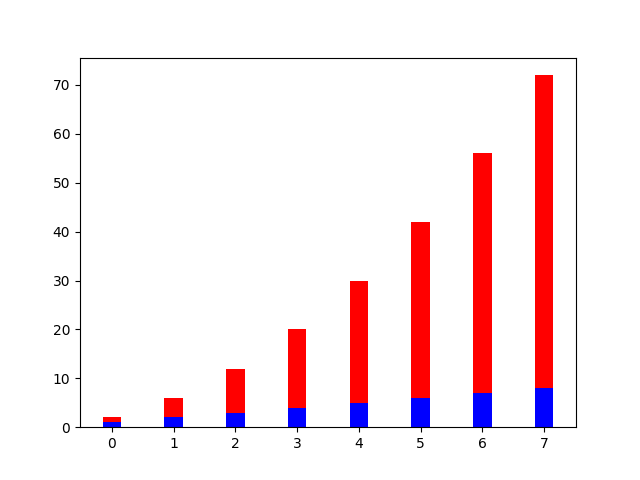

<BarContainer object of 8 artists>

In [35]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


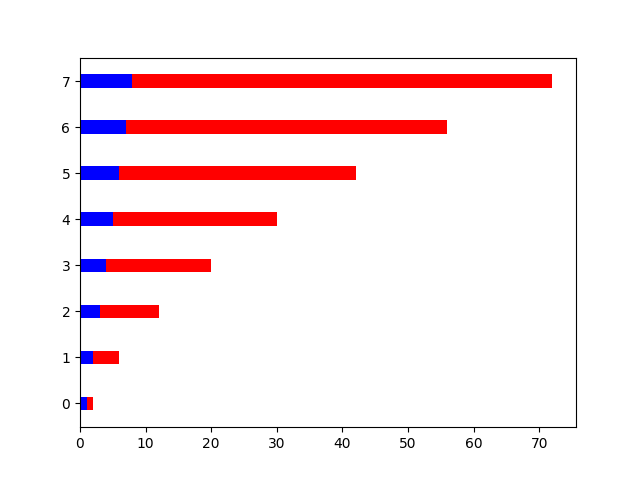

<BarContainer object of 8 artists>

In [36]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')